In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from datetime import datetime,timedelta
from sklearn.linear_model import LinearRegression

In [11]:
#-----------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------
#                                          Modelo por numero de dias 01/03/2020 - 11/04/2021


In [85]:


covidecu = pd.read_csv('../Recursos-Tareas/CovidEcuador.csv')
covidecu = covidecu.fillna(0)
covidecu['date']=pd.to_datetime(covidecu["date"]).dt.strftime("%d-%m-%Y")
covidecu['date'] = covidecu['date'].map(lambda x : (datetime.strptime(x, "%d-%m-%Y") - datetime.strptime("01-01-2020", "%d-%m-%Y")).days)
covidecu

,date,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests,new_tests_smoothed,new_tests_smoothed_per_thousand,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,new_vaccinations_smoothed_per_million
0,60,6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,61,6,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,62,7,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,63,10,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,64,13,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,462,339604,1902,17057.0,53.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12809.0,726.0
402,463,341619,2015,17115.0,58.0,0.0,0.0,0.0,0.0,363255.0,250631.0,112624.0,0.0,11450.0,649.0
403,464,342678,1059,17158.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17323.0,982.0
404,465,344877,2199,17275.0,117.0,0.0,0.0,0.0,0.0,457460.0,274160.0,183300.0,0.0,23197.0,1315.0


Text(0, 0.5, 'Contagios')

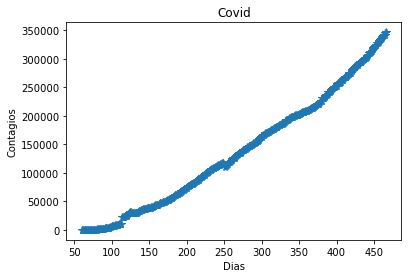

In [36]:
plt.plot(covidecu['date'], covidecu['total_cases'], '*', markersize=8, label='')
plt.title('Covid')  
plt.xlabel('Dias')  
plt.ylabel('Contagios') 

In [37]:
#Identificar variables dependientes e independites 
X3=covidecu['date'].values.reshape(-1,1)
Y3= covidecu['total_cases'].values.reshape(-1,1)
X_train3, X_test3,y_train3, y_test3 = train_test_split(X3, Y3, test_size=.2, random_state = 42)

In [76]:
model3 = LinearRegression()
model3.fit(X_test3, y_test3)
y_pred3=model3.predict(X_test3)

Text(0.5, 1.0, 'Entrenamiento')

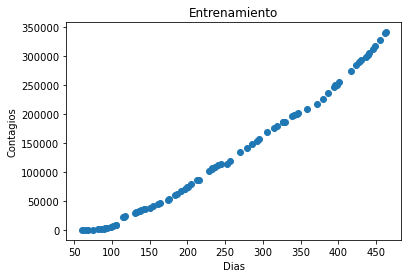

In [80]:
plt.scatter(X_test3, y_test3)
#plt.plot(y_test3, y_pred3,'*r')
plt.xlabel('Dias')  
plt.ylabel('Contagios') 
plt.title('Entrenamiento')

In [81]:
#prediccion en un rango de dias
dias=np.arange(80, 517, dtype=int)
predecir_dias=model3.predict(dias.reshape(-1,1))

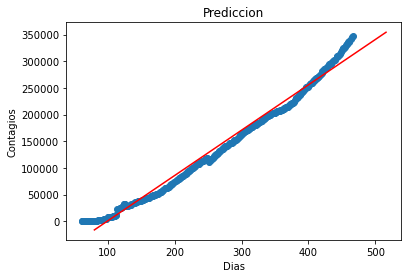

In [82]:
plt.scatter(X_train3, y_train3)
plt.plot(dias, predecir_dias, '-r')
plt.xlabel('Dias')  
plt.ylabel('Contagios') 
plt.title('Prediccion')
plt.show() 

In [116]:
#prediccion 15/04/2021
dia=model3.predict([[513]])
dia

array([[351943.06726651]])

In [140]:
#prediccion 2 - 3 Noviembre 2020
dia_antes=model3.predict([[300]])
dia_despues=model3.predict([[315]])
print("Dia 04/11/2020 = ",dia_antes,"\n Dia 15/11/2020 = ",dia_despues)

Dia 04/11/2020 =  [[170830.48089703]] 
 Dia 15/11/2020 =  [[183584.88838784]]


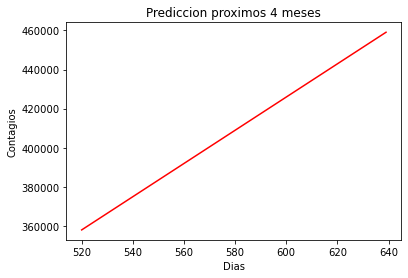

In [103]:
#prediccion de los proximos 4 meses 
meses=np.arange(520, 640, dtype=int)
predecir_meses=model3.predict(meses.reshape(-1,1))
plt.plot(meses, predecir_meses, '-r')
plt.xlabel('Dias')  
plt.ylabel('Contagios') 
plt.title('Prediccion proximos 4 meses')
plt.show() 

In [114]:
rt2 = pd.DataFrame({'Actual': meses.flatten(), 'Prediccion': predecir_meses.flatten()})
rt2

,Actual,Prediccion
0,520,357895.124096
1,521,358745.417928
2,522,359595.711761
3,523,360446.005594
4,524,361296.299426
...,...,...
115,635,455678.914858
116,636,456529.208691
117,637,457379.502524
118,638,458229.796357


In [83]:
#-------------------------------------
#-------------------------------------
#      Modelo Calcular numero Muertes


Text(0.5, 1.0, 'Prediccion')

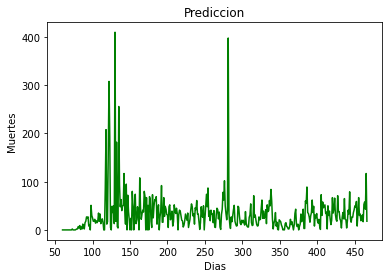

In [97]:
plt.plot(covidecu['date'], covidecu['new_deaths'], '-g')
plt.xlabel('Dias')  
plt.ylabel('Muertes') 
plt.title('Prediccion')

In [45]:
X4=covidecu['date'].values.reshape(-1,1)
Y4=covidecu['new_deaths']

X_train4, X_test4,y_train4, y_test4 = train_test_split(X4, Y4, test_size=.2, random_state = 42)
model3 = LinearRegression()
model3.fit(X_train4, y_train4)

LinearRegression()

In [46]:
y_pred4=model3.predict(X_test4)


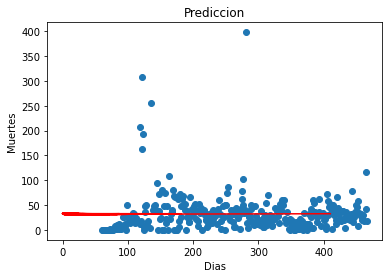

In [48]:
plt.scatter(X_train4, y_train4)
plt.plot(y_test4, y_pred4, '-r')
plt.xlabel('Dias')  
plt.ylabel('Muertes') 
plt.title('Prediccion')
plt.show() 

In [50]:
######
######
#####                Modelo Multivariable 
####
#### analisis variable independites fecha, test nuevos y casos nuevos

In [151]:

df1 =covidecu
#df1['date']=pd.to_datetime(df1["date"]).dt.strftime("%d%m%Y")
#df1['date']=df1['date'].astype(int)
df1

,date,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests,new_tests_smoothed,new_tests_smoothed_per_thousand,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,new_vaccinations_smoothed_per_million
0,60,6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,61,6,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,62,7,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,63,10,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,64,13,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,462,339604,1902,17057.0,53.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12809.0,726.0
402,463,341619,2015,17115.0,58.0,0.0,0.0,0.0,0.0,363255.0,250631.0,112624.0,0.0,11450.0,649.0
403,464,342678,1059,17158.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17323.0,982.0
404,465,344877,2199,17275.0,117.0,0.0,0.0,0.0,0.0,457460.0,274160.0,183300.0,0.0,23197.0,1315.0


In [152]:
X1 = df1[['date', 'new_cases', 'new_tests']]
y1 = df1['total_cases']

In [153]:
X_train1, X_test1,y_train1, y_test1 = train_test_split(X1, y1, test_size=.2, random_state = 42)

In [154]:
regressor = LinearRegression()
regressor.fit(X_train1, y_train1)

LinearRegression()

In [162]:
y_pred1 = regressor.predict(X_test1)
rt = pd.DataFrame({'Actual': y_test1, 'Prediccion': y_pred1})
rt

,Actual,Prediccion
70,29559,23528.494085
218,142056,150953.297997
258,180295,184122.264388
33,3368,-6100.793542
42,7466,1605.066639
...,...,...
90,38571,42147.059862
378,302498,290805.618072
340,255412,253130.102299
375,299216,283529.601715


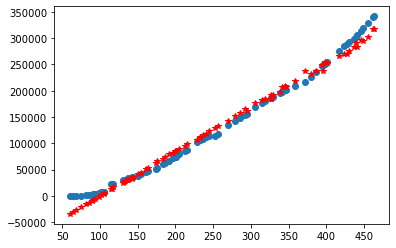

In [163]:
#import matplotlib.pyplot as plt 
plt.scatter(X_test1['date'], y_test1)
plt.plot(X_test1['date'], y_pred1,'*r')
plt.show()
#X_test1['date']

In [164]:
#######
#######
#######
######             Modelo Multivariable 
###
#    analisis fecha y nuevos test para predecir casos nuevos covid

In [165]:
X2= df1[['date','new_tests']]
y2=df1['new_cases'].values.reshape(-1,1)

X_train2, X_test2,y_train2, y_test2 = train_test_split(X2, y2, test_size=.2, random_state = 42)

In [166]:
model2 = LinearRegression()
model2.fit(X_train2, y_train2)

print(model2.intercept_)

#pendiente:
print(model2.coef_)

[209.60869208]
[[0.29766283 0.21731888]]


In [167]:
y_pred2 = model2.predict(X_test2)

In [180]:
rt2 = pd.DataFrame({'Fecha': X_test2['date'].values,'Test Nuevos': y_test2.flatten(), 'Prediccion': y_pred2.flatten()})
rt2

,Fecha,Test Nuevos,Prediccion
0,130,488,642.521313
1,279,717,852.470063
2,319,668,988.031020
3,93,205,314.222220
4,102,209,323.203433
...,...,...,...
77,150,0,365.742704
78,439,277,566.946270
79,401,2073,1578.555060
80,436,1259,1336.448718


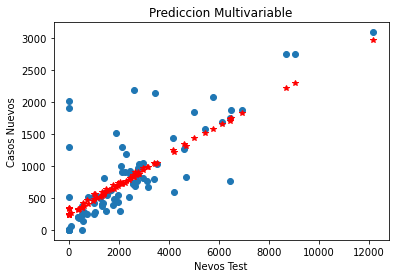

In [183]:
plt.scatter(X_test2['new_tests'].values, y_test2)
plt.plot(X_test2['new_tests'].values, y_pred2,'*r')
plt.xlabel('Nevos Test')  
plt.ylabel('Casos Nuevos') 
plt.title('Prediccion Multivariable')
plt.show() 